<a href="https://colab.research.google.com/github/rhezapal/MiniProject5/blob/main/Mini_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 5 - Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data Set

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Rakamin Mini Project/Mini Project 5/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')

In [ ]:
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
for col in df:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print()

Value count kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value count kolom EnterpriseID:
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64

Value count kolom StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count kolom JenisKelamin:
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value count kolom StatusKepegawaian:
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count kolom Pekerjaan:
Software Engineer (Back End)     

# Task 1 : Data Preprocessing

Hal yang dilakukan :
- Handling Null Value
- Mengganti value yang sesuai
- Dropping kolom (khusus yang memiliki satu nilai sama)

In [ ]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

## Handling Null Value

### EnterpriseID

tipe data berbeda, jadi diganti menjadi string

In [ ]:
df['EnterpriseID'].nunique()

287

In [ ]:
df['EnterpriseID'] = df['EnterpriseID'].astype(str)

### Status Pernikahan

replace - menjadi lainnya

In [ ]:
df.StatusPernikahan.replace('-','Lainnya',inplace=True)

In [ ]:
df.StatusPernikahan.value_counts()

Belum_menikah    132
Menikah           57
Lainnya           51
Bercerai          47
Name: StatusPernikahan, dtype: int64

### Skor Kepuasan Pegawai

In [ ]:
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)

In [ ]:
df.SkorKepuasanPegawai.value_counts()

3.0    96
5.0    91
4.0    90
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

### Jumlah Keikutsertaan Projek

In [ ]:
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)

In [ ]:
df.JumlahKeikutsertaanProjek.value_counts()

0.0    224
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: JumlahKeikutsertaanProjek, dtype: int64

### Jumlah Keterlambatan Sebulan Terakhir

In [ ]:
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)

In [ ]:
df.JumlahKeterlambatanSebulanTerakhir.value_counts()

0.0    256
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64

### Jumlah Ketidakhadiran

In [ ]:
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)

In [ ]:
df.JumlahKetidakhadiran.value_counts()

4.0     20
2.0     20
15.0    19
16.0    17
7.0     17
6.0     16
10.0    16
14.0    16
3.0     16
13.0    15
19.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

### Alasan Resign

In [ ]:
dfAlasanResign = df[df['AlasanResign'].isnull()] ##filter mencari Alasan Resign yang null value

In [ ]:
dfAlasanResign.TanggalResign.value_counts() ##Alasan Resign yang - ini, tanggal Resignnyaa juga -, berarti masih bekerja

-    66
Name: TanggalResign, dtype: int64

In [ ]:
df['AlasanResign'].loc[df['AlasanResign'].isnull()==True]='masih_bekerja'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.AlasanResign.value_counts()

masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

### Checking Null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    object 
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

## Dropping Feature

In [ ]:
df = df.drop(columns = ['PernahBekerja','IkutProgramLOP','Username','NomorHP','Email'] ) #drop fitur

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    object 
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

## Duplicated Data

In [ ]:
df.duplicated().sum()

0

# Task 2 : Annual Report on Employee Number Changes

Yang dilakukan:
1. Membuat Tabel agregat 1 dari tahun hiring dan jumlah karyawan yang masuk dan dan tabel agregat 2 tahun resign dan jumlah karyawan yang resign
2. Tabel Agregat 1 dan 2 di outer join
3. Mengisi kolom kosong di gabungan tabel agregat
4. Dihitung jumlah karyawan yang masih bertahan (Karyawan yang masih ada dikurang dengan karyawan yang resign)
5. Membuat plotnya

In [ ]:
df['is_resign']=np.where(df['AlasanResign']=='masih_bekerja','0','1')
# 0 : tidak resign
# 1 : resign

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    object 
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

## Agregasi Jumlah Karyawan Hiring dan Resign Pertahun

In [ ]:
df['tahun_hiring'] = df['TanggalHiring'].str[:4]

In [ ]:
df2a =df.groupby(['tahun_hiring'])['EnterpriseID'].agg({'count'}).reset_index()
df2a =df2a.rename(columns ={'count':'jumlah_hiring'})
df2a
#df2a = aggregasi jumlah karyawan yang dihire per tahun

,tahun_hiring,jumlah_hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [ ]:
df2b =df[df['is_resign']=='1'] 
#df2b = tabel filter karyawan sudah resign (!=='-')

In [ ]:
df2b

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,tahun_hiring
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,...,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,1,2014
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,...,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,1,2011
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,...,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1,2013
10,105548,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Kurang,Jakarta Timur,CareerBuilder,3,...,3.0,3.0,Sarjana,ganti_karir,1975-12-17,2010-7-20,2020-1-14,2019-01-12,1,2010
11,111354,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,1,...,5.0,2.0,Magister,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-9-19,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,106225,Lainnya,Pria,FullTime,Product Manager,Mid_level,Biasa,Jakarta Selatan,LinkedIn,2,...,0.0,14.0,Doktor,jam_kerja,1992-08-17,2011-11-07,2020-01-08,2018-06-08,1,2011
276,106518,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,CareerBuilder,3,...,0.0,13.0,Magister,kejelasan_karir,1986-04-26,2010-8-30,2020-01-10,2018-04-01,1,2010
283,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,...,0.0,11.0,Sarjana,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15,1,2013
284,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,...,0.0,17.0,Sarjana,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08,1,2013


In [ ]:
df['tahun_resign'] = df['TanggalResign'].str[:4]

In [ ]:
df

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,...,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,tahun_hiring,tahun_resign
0,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,...,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,0,2011,-
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,...,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,1,2014,2018
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,...,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,1,2011,2014
3,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,...,6.0,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,0,2014,-
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,...,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,...,16.0,Sarjana,masih_bekerja,1973-12-08,2011-9-26,2016-03-01,-,0,2011,-
283,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,...,11.0,Sarjana,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15,1,2013,2017
284,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,...,17.0,Sarjana,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08,1,2013,2018
285,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,...,20.0,Sarjana,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01,1,2011,2018


In [ ]:
df2b = df[df['tahun_resign'] != '-']
df2b = df2b.groupby(['tahun_resign'])['EnterpriseID'].agg({'count'}).reset_index()
df2b = df2b.rename(columns ={'count':'jumlah_resign'})
df2b
#df2b = tabel aggregasi jumlah karyawan yang resign pertahun

,tahun_resign,jumlah_resign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


In [ ]:
df2c = df2a.merge(df2b,left_on='tahun_hiring',right_on='tahun_resign',how='outer')
df2c
#df2c = gabungan tabel df2a, dan df2b

,tahun_hiring,jumlah_hiring,tahun_resign,jumlah_resign
0,2006,1.0,NaN,NaN
1,2007,2.0,NaN,NaN
2,2008,2.0,NaN,NaN
3,2009,7.0,NaN,NaN
4,2010,8.0,NaN,NaN
5,2011,76.0,NaN,NaN
6,2012,41.0,NaN,NaN
7,2013,43.0,2013,5.0
8,2014,56.0,2014,12.0
9,2015,31.0,2015,8.0


In [ ]:
df2c['tahun_resign'].fillna(df2c['tahun_hiring'], inplace=True)
df2c['tahun_hiring'].fillna(df2c['tahun_resign'], inplace=True)
df2c.fillna(0,inplace=True)
df2c

,tahun_hiring,jumlah_hiring,tahun_resign,jumlah_resign
0,2006,1.0,2006,0.0
1,2007,2.0,2007,0.0
2,2008,2.0,2008,0.0
3,2009,7.0,2009,0.0
4,2010,8.0,2010,0.0
5,2011,76.0,2011,0.0
6,2012,41.0,2012,0.0
7,2013,43.0,2013,5.0
8,2014,56.0,2014,12.0
9,2015,31.0,2015,8.0


In [ ]:
df2c['total_karyawan'] =  df2c['jumlah_hiring'].cumsum() - df2c['jumlah_resign'].cumsum()
df2c['perubahan'] = df2c['jumlah_hiring']- df2c['jumlah_resign']

In [ ]:
df2c

,tahun_hiring,jumlah_hiring,tahun_resign,jumlah_resign,total_karyawan,perubahan
0,2006,1.0,2006,0.0,1.0,1.0
1,2007,2.0,2007,0.0,3.0,2.0
2,2008,2.0,2008,0.0,5.0,2.0
3,2009,7.0,2009,0.0,12.0,7.0
4,2010,8.0,2010,0.0,20.0,8.0
5,2011,76.0,2011,0.0,96.0,76.0
6,2012,41.0,2012,0.0,137.0,41.0
7,2013,43.0,2013,5.0,175.0,38.0
8,2014,56.0,2014,12.0,219.0,44.0
9,2015,31.0,2015,8.0,242.0,23.0


## Data Visualisation : Waterfall plot

### Waterfall plot by Matplotlib

In [ ]:
!pip install waterfallcharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import waterfall_chart
import matplotlib.pyplot as plt
%matplotlib inline

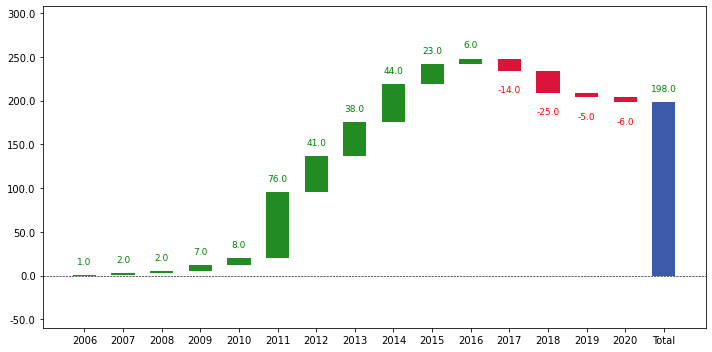

In [ ]:
plt.rcParams.update({'figure.figsize':(10,5)})
waterfall_chart.plot(df2c['tahun_hiring'], df2c['perubahan'], net_label='Total', 
                     green_color='#228B22', red_color='#DC143C', blue_color='#3D59AB',rotation_value=360) 
plt.tight_layout()

### Waterfall plot by plotly

In [ ]:
d = {'tahun_hiring':['Total'],'jumlah_hiring':[0], 'tahun_resign':[2021], 'jumlah_resign':[0], 'total_karyawan':[198], 'perubahan':[198]}
dft = pd.DataFrame(data=d, index=[15])


In [ ]:
dft

,tahun_hiring,jumlah_hiring,tahun_resign,jumlah_resign,total_karyawan,perubahan
15,Total,0,2021,0,198,198


In [ ]:
df2c1=df2c.append(dft)

In [ ]:
df2c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tahun_hiring    16 non-null     object 
 1   jumlah_hiring   16 non-null     float64
 2   tahun_resign    16 non-null     object 
 3   jumlah_resign   16 non-null     float64
 4   total_karyawan  16 non-null     float64
 5   perubahan       16 non-null     float64
dtypes: float64(4), object(2)
memory usage: 896.0+ bytes


In [ ]:
df2c1['measure']=["relative", "relative", "relative", "relative", "relative", "relative", "relative",
              "relative", "relative", "relative", "relative", "relative", "relative", "relative",'relative',"total"]

In [ ]:
df2c1

,tahun_hiring,jumlah_hiring,tahun_resign,jumlah_resign,total_karyawan,perubahan,measure
0,2006,1.0,2006,0.0,1.0,1.0,relative
1,2007,2.0,2007,0.0,3.0,2.0,relative
2,2008,2.0,2008,0.0,5.0,2.0,relative
3,2009,7.0,2009,0.0,12.0,7.0,relative
4,2010,8.0,2010,0.0,20.0,8.0,relative
5,2011,76.0,2011,0.0,96.0,76.0,relative
6,2012,41.0,2012,0.0,137.0,41.0,relative
7,2013,43.0,2013,5.0,175.0,38.0,relative
8,2014,56.0,2014,12.0,219.0,44.0,relative
9,2015,31.0,2015,8.0,242.0,23.0,relative


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    x = df2c1['tahun_hiring'],
    measure = df2c1['measure'],
    textposition = "outside",
    text = df2c1['perubahan'],
    y = df2c1['perubahan'],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
    totals = {"marker":{"color":"deep sky blue"}}
))

fig.update_layout(
        title = "Dinamika Pertumbuhan Karyawan tahun 2006-2020", margin=dict(t=80, b=20, l=50, r=50),
        xaxis_title='Tahun', yaxis_title="Jumlah Karyawan", showlegend = True
)

fig.show()

## Interpretasi

1. Berdasarkan waterfall plot, pada 10 tahun pertama (2006-2016), jumlah karyawan yang direkrut terus bertambah dibandingkan dengan jumlah karyawan yang resign. 
2. Pertumbuhan jumlah karyawan yang paling tinggi sebanyak 76 orang terjadi pada tahun 2011. Sampai pada tahun 2016, pertumbuhan jumlah karyawan berhenti dengan bertambahnya 6 orang. Pada akhir tahun 2016,jumlah karyawan sebanyak 248 orang
3. Setelah tahun 2016, karyawan yang resign lebih banyak. Karyawan yang resign paling banyak terjadi pada tahun 2018, yakni berkurang 25 orang.
Sampai tahun 2020, total karyawan yang resign terus bertambah, sehingga akhir tahun 2020, jumlah karyawan sebanyak 198 orang Dari tahun 2016 sampai akhir tahun 2020, jumlah karyawan berkurang sebanyak 20,16 % atau sebanyak 50 orang.

# Task 3 : Resign Reason Analysis for Employee Attrition Management Strategy

Hal yang dilakukan: 

- A
1. Membuat tabel aggregasi jumlah karyawan yang resign dan yang belum berdasarkan pekerjaannya, kemudian dilakukan outer join
2. Membuat 2 kolom baru : jumlah employee (jumlah karyawan resign + belum resign) dan % jumlah karyawan yang masih ada (jumlah karyawan belum resign / total karyawan)
3. Membuat plotnya
- B
1. Untuk divisi yang tingkat resign tertinggi, membuat tabel aggregasi jumlah karyawan yang resign berdasarkan karir, performa, alasan resign
2. Membuat plotnya
3. Buat interpretasinya

## Aggregasi Jumlah Karyawan Resign per Divisi

In [ ]:
df3a = df[df['tahun_resign'] != '-'] ## berarti cari yang resign
df3a1 = df3a.groupby(['Pekerjaan'])['EnterpriseID'].agg({'count'}).reset_index()
df3a1 =df3a1.rename(columns ={'count':'jumlah_resign'})
df3a1

,Pekerjaan,jumlah_resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [ ]:
df3b = df[df['tahun_resign'] == '-'] ## berarti cari yang belum resign
df3b1 = df3b.groupby(['Pekerjaan'])['EnterpriseID'].agg({'count'}).reset_index()
df3b1 =df3b1.rename(columns ={'count':'jumlah_belum_resign'})
df3b1

,Pekerjaan,jumlah_belum_resign
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [ ]:
df3c = df3a1.merge(df3b1,left_on='Pekerjaan',right_on='Pekerjaan',how='outer')
df3c
#df3c = gabungan tabel df3a1, dan df3b1

,Pekerjaan,jumlah_resign,jumlah_belum_resign
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,NaN,3
8,Digital Product Manager,NaN,2
9,Machine Learning Engineer,NaN,2


In [ ]:
df3c['jumlah_resign'].fillna(0, inplace=True)
df3c

,Pekerjaan,jumlah_resign,jumlah_belum_resign
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,0.0,3
8,Digital Product Manager,0.0,2
9,Machine Learning Engineer,0.0,2


In [ ]:
df3c['jumlah_karyawan'] = df3c['jumlah_resign']+df3c['jumlah_belum_resign']
df3c

,Pekerjaan,jumlah_resign,jumlah_belum_resign,jumlah_karyawan
0,Data Analyst,8.0,8,16.0
1,Data Engineer,3.0,7,10.0
2,Product Design (UI & UX),9.0,15,24.0
3,Product Manager,6.0,11,17.0
4,Software Engineer (Android),7.0,17,24.0
5,Software Engineer (Back End),28.0,81,109.0
6,Software Engineer (Front End),28.0,44,72.0
7,DevOps Engineer,0.0,3,3.0
8,Digital Product Manager,0.0,2,2.0
9,Machine Learning Engineer,0.0,2,2.0


In [ ]:
df3c['%existing'] = round((df3c['jumlah_belum_resign']/df3c['jumlah_karyawan']*100),2)
df3c['%resign'] = round((df3c['jumlah_resign']/df3c['jumlah_karyawan']*100),2)
df3c1= df3c.sort_values('%resign',ascending = False)
df3c1

,Pekerjaan,jumlah_resign,jumlah_belum_resign,jumlah_karyawan,%existing,%resign
0,Data Analyst,8.0,8,16.0,50.00,50.00
6,Software Engineer (Front End),28.0,44,72.0,61.11,38.89
2,Product Design (UI & UX),9.0,15,24.0,62.50,37.50
3,Product Manager,6.0,11,17.0,64.71,35.29
1,Data Engineer,3.0,7,10.0,70.00,30.00
4,Software Engineer (Android),7.0,17,24.0,70.83,29.17
5,Software Engineer (Back End),28.0,81,109.0,74.31,25.69
7,DevOps Engineer,0.0,3,3.0,100.00,0.00
8,Digital Product Manager,0.0,2,2.0,100.00,0.00
9,Machine Learning Engineer,0.0,2,2.0,100.00,0.00


In [ ]:
#tingkat resign yang tinggi adalah Data Analyst

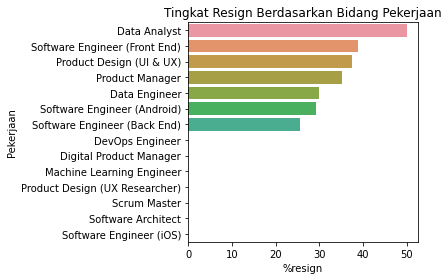

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="%resign", y ='Pekerjaan', data=df3c1, orient ='h')
plt.title('Tingkat Resign Berdasarkan Bidang Pekerjaan', fontsize=12)
plt.tight_layout();

## Agregasi Alasan Resign, Jenjang karier, dan performance Pegawai yang Tingkat Resign tertinggi

In [ ]:
df3d = df[(df['tahun_resign'] != '-' ) & (df['Pekerjaan'] == 'Data Analyst')] ## berarti cari yang resign dan data analyst
df3d

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,...,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,tahun_hiring,tahun_resign
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,...,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,1,2014,2018
18,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,...,17.0,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,1,2012,2017
86,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,...,2.0,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15,1,2016,2017
102,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,...,20.0,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,1,2012,2018
106,101192,Lainnya,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,...,20.0,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-8-19,1,2013,2014
108,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,...,10.0,Sarjana,toxic_culture,1976-09-22,2015-3-30,2020-1-21,2014-8-19,1,2015,2014
233,100317,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,4,...,4.0,Magister,toxic_culture,1970-02-11,2009-07-06,2020-1-25,2015-06-05,1,2009,2015
239,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,4,...,2.0,Magister,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-6-25,1,2011,2017


In [ ]:
#aggregasi jenjang karier dari data analyst
df3d1 = df3d.groupby(['Pekerjaan','JenjangKarir','AlasanResign','PerformancePegawai'])['EnterpriseID'].agg({'count'}).reset_index()
df3d1

,Pekerjaan,JenjangKarir,AlasanResign,PerformancePegawai,count
0,Data Analyst,Freshgraduate_program,internal_conflict,Biasa,1
1,Data Analyst,Freshgraduate_program,internal_conflict,Sangat_bagus,1
2,Data Analyst,Freshgraduate_program,toxic_culture,Bagus,1
3,Data Analyst,Freshgraduate_program,toxic_culture,Biasa,1
4,Data Analyst,Freshgraduate_program,toxic_culture,Sangat_bagus,3
5,Data Analyst,Freshgraduate_program,toxic_culture,Sangat_kurang,1


## Data Visualisasi : Sunburst Plot

In [ ]:
import plotly.express as px

fig = px.sunburst(
    df3d1, title = 'Detail Jenjang Karir, Alasan Resign, dan Performance dari Pekerjaan Data Analyst',path=['Pekerjaan', 'JenjangKarir','AlasanResign','PerformancePegawai'], values='count',
    color='AlasanResign',color_discrete_map={'(?)':'#33A1C9','toxic_culture':'#DB7093','internal_conflict':'#FF82AB'})

fig.show()

## Interpretasi

* Dari 8 orang Data Analyst yang resign, kita perlu mengetahui latar belakang mereka berdasarkan Jenjang Karir, Alasan Resign dan Performance selama bekerja.
* Berdasarkan jenjang karir, ke-delapan data analyst yang resign berasal dari jenjang freshgraduate.
* Mereka yang resign mayoritas beralasan toxic culture dan alasan lainnya seperti internal confict. Kedua alasan tersebut merupakan alasan yang berasal dari kondisi bekerja yang tidak nyaman. 
* Lima dari Delapan karyawan memiliki performance pekerjaan dari bagus sampai sangat bagus. Hal ini cukup disayangkan, karena dari sisi pekerjaan, mereka dapat diandalkan, tetapi memilih untuk resign.
* Untuk Manajemen, perlu melakukan root cause analysis penyebab adanya toxic culture di perusahaan, apakah dari sisi perusahaannya atau sisi perilaku karyawannya 


# Task 4 : Build an Automated Resignation Behaviour Prediction using Machine Learning

## Analisis Univariate

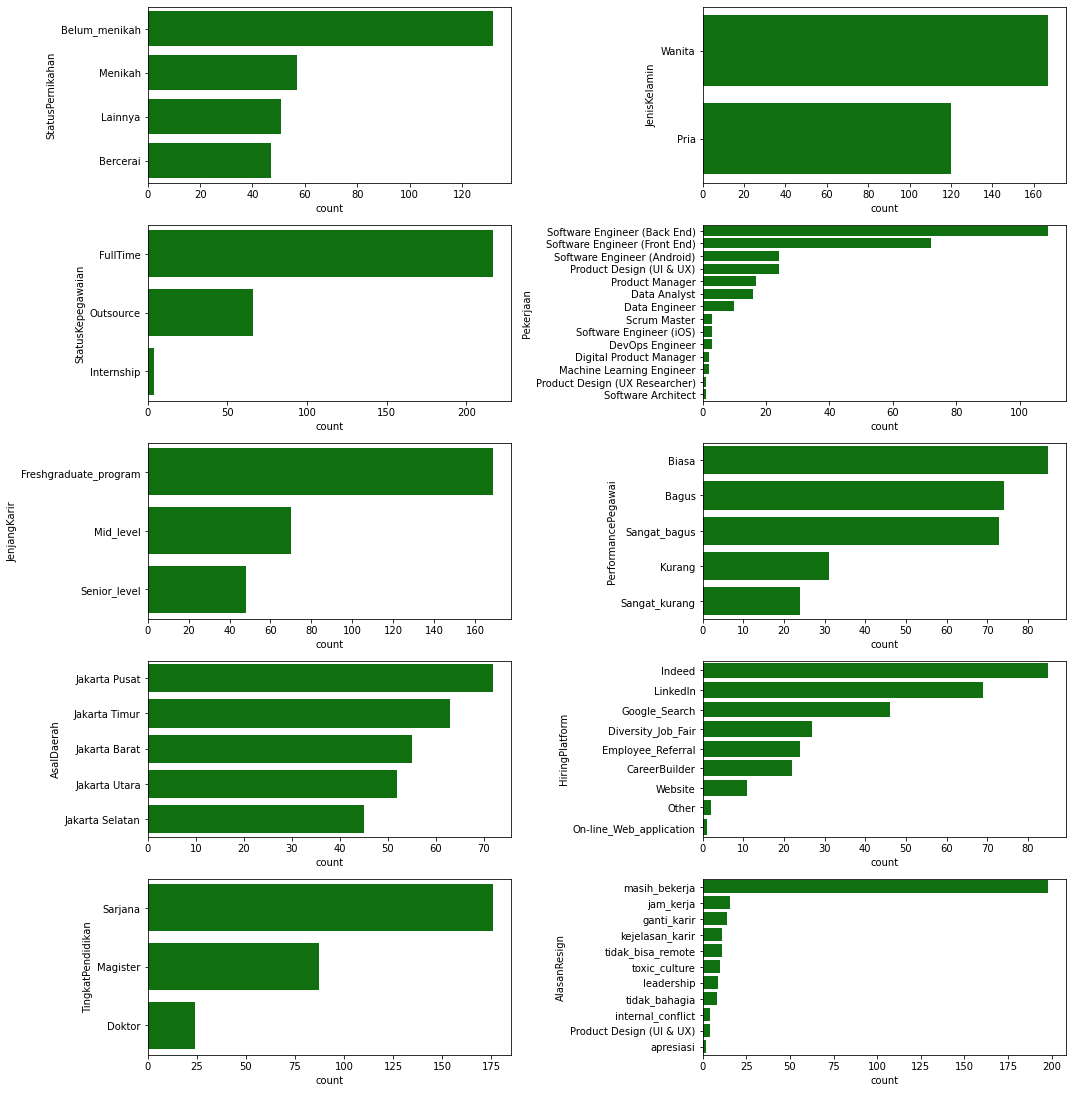

In [ ]:
cats2 = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir',
         'PerformancePegawai','AsalDaerah','HiringPlatform', 'TingkatPendidikan','AlasanResign']
plt.figure(figsize=(15, 30))
for i in range(0, len(cats2)):
  plt.subplot(10, 2, i+1)
  sns.countplot(y = df[cats2[i]], order=df[cats2[i]].value_counts().index, color = 'green', orient = 'v')
  plt.tight_layout()


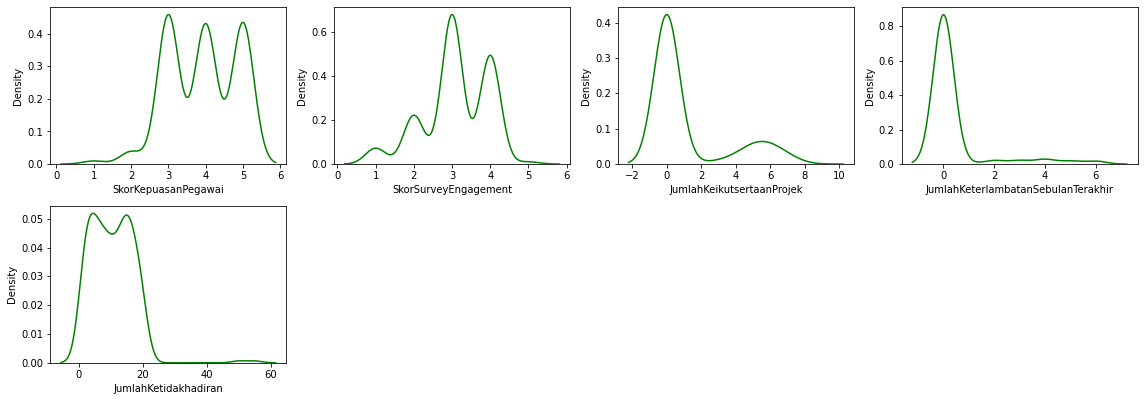

In [ ]:
num=['SkorKepuasanPegawai','SkorSurveyEngagement','JumlahKeikutsertaanProjek',
     'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']
plt.figure(figsize= (16,8))
for i in range (0, len(num)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(x = df[num[i]], color = 'green')
  plt.xlabel(num[i])
  plt.tight_layout();

In [ ]:
df[cats2].describe()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,TingkatPendidikan,AlasanResign
count,287,287,287,287,287,287,287,287,287,287
unique,4,2,3,14,3,5,5,9,3,11
top,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,Sarjana,masih_bekerja
freq,132,167,217,109,169,85,72,85,176,198


In [ ]:
df[num].describe()

,SkorKepuasanPegawai,SkorSurveyEngagement,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,287.000000,287.000000,287.000000
mean,3.905923,3.101045,1.167247,0.411150,10.439024
std,0.905423,0.836388,2.285537,1.273018,6.829769
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,5.000000
50%,4.000000,3.000000,0.000000,0.000000,10.000000
75%,5.000000,4.000000,0.000000,0.000000,15.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000


## Analisis Multivariate

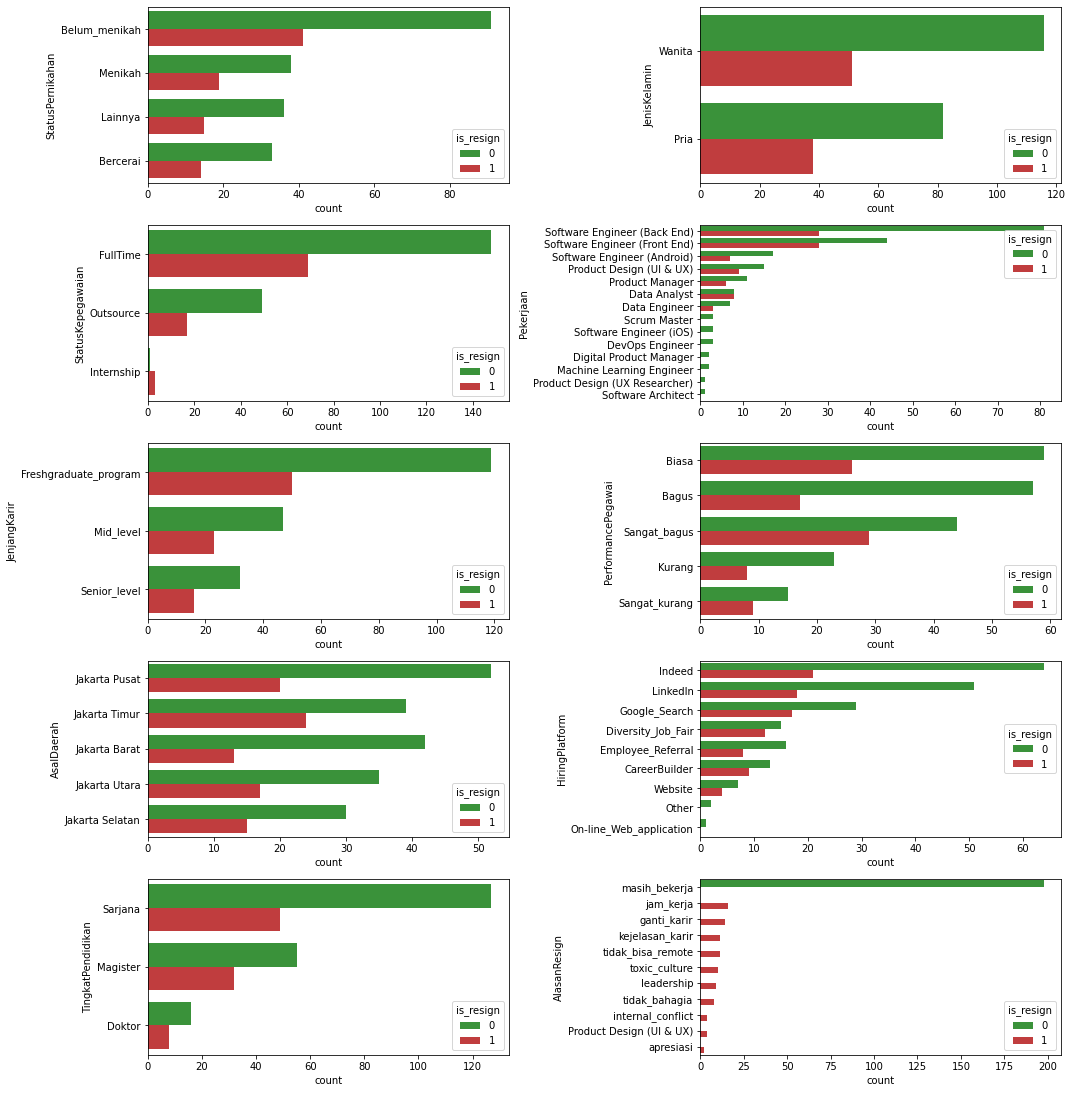

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(cats2)):
  plt.subplot(10, 2, i+1)
  sns.countplot(y = df[cats2[i]], order=df[cats2[i]].value_counts().index, hue='is_resign', palette=['tab:green', 'tab:red'], data=df, color = 'green', orient = 'v')
  plt.tight_layout()

  # 0 / green : belum resign
  # 1 / red : resign


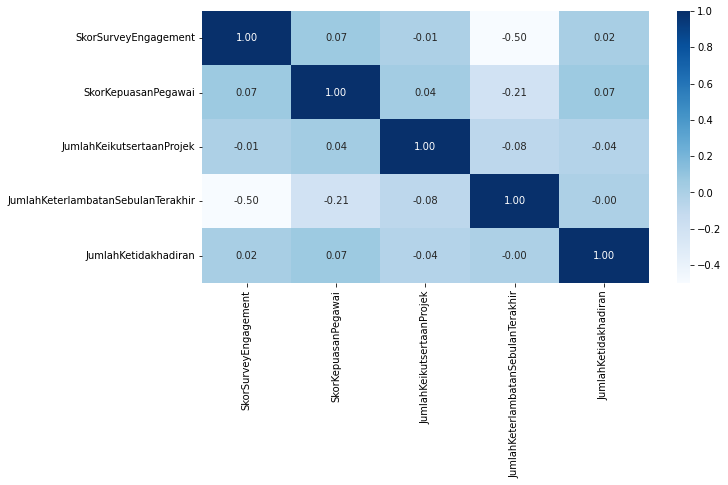

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    object 
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

## Feature Engineering 

### usia_hiring

In [ ]:
df['tahun_lahir'] = df['TanggalLahir'].str[:4]

In [ ]:
df.tahun_resign.replace('-','0',inplace=True)

In [ ]:
df.tahun_lahir=pd.to_numeric(df.tahun_lahir)
df.tahun_hiring=pd.to_numeric(df.tahun_hiring)
df.tahun_resign=pd.to_numeric(df.tahun_resign)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    object 
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

In [ ]:
df['usia_hiring'] = df['tahun_hiring']-df['tahun_lahir']

### lama_kerja

In [ ]:
import time
from datetime import date
t = date.today()
t

datetime.date(2022, 12, 10)

In [ ]:
y1 =t.strftime("%Y")

In [ ]:
y1

'2022'

In [ ]:
y1
type(y1)

str

In [ ]:
#berubah tipe data dari string menjadi integer
year_today = int(y1)

In [ ]:
year_today

2022

In [ ]:
type(year_today)

int

In [ ]:
for i in df['tahun_resign']:
  if i !=0:
    df['lama_kerja']= df['tahun_resign'] - df['tahun_hiring']
  else:
    df['lama_kerja']= year_today - df['tahun_hiring']
# untuk dataframe gak bisa pakai if langsung, perlu ditambah for

In [ ]:
df

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,...,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,tahun_hiring,tahun_resign,tahun_lahir,usia_hiring,lama_kerja
0,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,...,1972-07-01,2011-01-10,2016-2-15,-,0,2011,0,1972,39,11
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,...,1984-04-26,2014-01-06,2020-1-17,2018-6-16,1,2014,2018,1984,30,8
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,...,1974-01-07,2011-01-10,2016-01-10,2014-9-24,1,2011,2014,1974,37,11
3,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,...,1979-11-24,2014-2-17,2020-02-04,-,0,2014,0,1979,35,8
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,...,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1,2013,2018,1974,39,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,...,1973-12-08,2011-9-26,2016-03-01,-,0,2011,0,1973,38,11
283,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,...,1974-12-01,2013-5-13,2020-1-28,2017-11-15,1,2013,2017,1974,39,9
284,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,...,1969-10-30,2013-11-11,2020-1-21,2018-06-08,1,2013,2018,1969,44,9
285,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,...,1981-10-01,2011-5-16,2014-04-05,2018-04-01,1,2011,2018,1981,30,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    object 
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

### JumlahKeikutsertaanProjek

In [ ]:
for i in df['JumlahKeikutsertaanProjek']:
  if i > 0:
    df['JumlahKeikutsertaanProjek_value']= 1
  else:
    df['JumlahKeikutsertaanProjek_value']= 0

In [ ]:
df.is_resign=pd.to_numeric(df.is_resign)

## Handling Outlier

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 273


## Feature Encoding

### Frequency Encoding : Hiring Platform

In [ ]:
hiring_enc = (df.groupby('HiringPlatform').size()) / len(df)


In [ ]:
hiring_enc

HiringPlatform
CareerBuilder              0.076923
Diversity_Job_Fair         0.095238
Employee_Referral          0.087912
Google_Search              0.157509
Indeed                     0.296703
LinkedIn                   0.238095
On-line_Web_application    0.003663
Other                      0.007326
Website                    0.036630
dtype: float64

In [ ]:
df['platform_hiring_encode'] = df['HiringPlatform'].apply(lambda x : hiring_enc[x])

<ipython-input-88-1cacdc59c82f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Dropping Feature (1)

In [ ]:
df = df.drop(columns = ['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign',
                        'tahun_hiring','tahun_resign','tahun_lahir','JumlahKeikutsertaanProjek'])
#drop TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign,tahun_hiring, tahun_resign, tahun_lahir : 
#sudah ditransformasi ke usia_hiring, dan lama bekerja
#jumlahkeikutsertaanprojek sudah ditransformasi menjadi 1/0

### Label Encoding : Performance Pegawai, Tingkat Pendidikan, dan Jenjang karir

In [ ]:
df_encode = df.copy()

In [ ]:
performancepegawai_map = {
                    'Sangat_kurang':0, 
                    'Kurang':1,
                    'Biasa':2,
                    'Bagus':3,
                    'Sangat_bagus':4
                    }
df_encode['PerformancePegawai']= df_encode['PerformancePegawai'].map(performancepegawai_map)

In [ ]:
tingkatpendidikan_map = {
                    'Sarjana':0, 
                    'Magister':1,
                    'Doktor':2
                    }
df_encode['TingkatPendidikan']= df_encode['TingkatPendidikan'].map(tingkatpendidikan_map)

In [ ]:
jenjangkarir_map = {
                    'Freshgraduate_program':0, 
                    'Mid_level':1,
                    'Senior_level':2
                    }
df_encode['JenjangKarir']= df_encode['JenjangKarir'].map(jenjangkarir_map)

In [ ]:
kategoripekerjaan_map = {
                    'Software Engineer (Back End)':'Software', 
                    'Software Engineer (Front End)':'Software',
                    'Software Engineer (Android)':'Software',
                    'Software Engineer (iOS)':'Software',
                    'DevOps Engineer':'Software',
                    'Software Architect':'Software',
                    'Data Analyst':'Data',
                    'Data Engineer':'Data',
                    'Machine Learning Engineer':'Data',
                    'Product Design (UI & UX)':'Product',
                    'Product Manager':'Product',
                    'Scrum Master':'Product',
                    'Digital Product Manager':'Product',
                    'Product Design (UX Researcher)':'Product'
                        }
                    
df_encode['KategoriPekerjaan']= df_encode['Pekerjaan'].map(kategoripekerjaan_map)

### One Hot Encoding : Status Pernikahan, Jenis Kelamin, Status Kepagawaian, dan Asal Daerah

In [ ]:
one_hot_cats=df_encode[['StatusPernikahan','JenisKelamin','StatusKepegawaian','AsalDaerah','KategoriPekerjaan']]
one_hot=pd.get_dummies(one_hot_cats)

In [ ]:
df_encode = df_encode.join(one_hot)

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 286
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        273 non-null    object 
 1   StatusPernikahan                    273 non-null    object 
 2   JenisKelamin                        273 non-null    object 
 3   StatusKepegawaian                   273 non-null    object 
 4   Pekerjaan                           273 non-null    object 
 5   JenjangKarir                        273 non-null    int64  
 6   PerformancePegawai                  273 non-null    int64  
 7   AsalDaerah                          273 non-null    object 
 8   HiringPlatform                      273 non-null    object 
 9   SkorSurveyEngagement                273 non-null    int64  
 10  SkorKepuasanPegawai                 273 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  273 non-n

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 286
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        273 non-null    object 
 1   StatusPernikahan                    273 non-null    object 
 2   JenisKelamin                        273 non-null    object 
 3   StatusKepegawaian                   273 non-null    object 
 4   Pekerjaan                           273 non-null    object 
 5   JenjangKarir                        273 non-null    int64  
 6   PerformancePegawai                  273 non-null    int64  
 7   AsalDaerah                          273 non-null    object 
 8   HiringPlatform                      273 non-null    object 
 9   SkorSurveyEngagement                273 non-null    int64  
 10  SkorKepuasanPegawai                 273 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  273 non-n

### Dropping Feature (2)

In [ ]:
df_model = df_encode.drop(columns = ['EnterpriseID','StatusPernikahan','JenisKelamin','StatusKepegawaian',
                          'Pekerjaan','KategoriPekerjaan','AsalDaerah','HiringPlatform', 'AlasanResign'])

#fitur yang didrop : Enterprise ID, Alasan Resign : di drop karena tingginya kardinalitas value
#StatusPernikahan, Jenis Kelamin, Status Kepegawaian, Pekerjaan, Asal Daerah, sudah ditransformasi One Hot Encoding
#HiringPlatform : ditransformasi Frequency Encoding



## Null Value Checking

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 286
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenjangKarir                        273 non-null    int64  
 1   PerformancePegawai                  273 non-null    int64  
 2   SkorSurveyEngagement                273 non-null    int64  
 3   SkorKepuasanPegawai                 273 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir  273 non-null    float64
 5   JumlahKetidakhadiran                273 non-null    float64
 6   TingkatPendidikan                   273 non-null    int64  
 7   is_resign                           273 non-null    int64  
 8   usia_hiring                         273 non-null    int64  
 9   lama_kerja                          273 non-null    int64  
 10  JumlahKeikutsertaanProjek_value     273 non-null    int64  
 11  platform_hiring_encode              273 non-n

In [ ]:
df_model.isna().sum()

JenjangKarir                          0
PerformancePegawai                    0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
TingkatPendidikan                     0
is_resign                             0
usia_hiring                           0
lama_kerja                            0
JumlahKeikutsertaanProjek_value       0
platform_hiring_encode                0
StatusPernikahan_Belum_menikah        0
StatusPernikahan_Bercerai             0
StatusPernikahan_Lainnya              0
StatusPernikahan_Menikah              0
JenisKelamin_Pria                     0
JenisKelamin_Wanita                   0
StatusKepegawaian_FullTime            0
StatusKepegawaian_Internship          0
StatusKepegawaian_Outsource           0
AsalDaerah_Jakarta Barat              0
AsalDaerah_Jakarta Pusat              0
AsalDaerah_Jakarta Selatan            0
AsalDaerah_Jakarta Timur              0


## Duplicated Data Checking

In [ ]:
df_model.duplicated().sum()

0

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 286
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenjangKarir                        273 non-null    int64  
 1   PerformancePegawai                  273 non-null    int64  
 2   SkorSurveyEngagement                273 non-null    int64  
 3   SkorKepuasanPegawai                 273 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir  273 non-null    float64
 5   JumlahKetidakhadiran                273 non-null    float64
 6   TingkatPendidikan                   273 non-null    int64  
 7   is_resign                           273 non-null    int64  
 8   usia_hiring                         273 non-null    int64  
 9   lama_kerja                          273 non-null    int64  
 10  JumlahKeikutsertaanProjek_value     273 non-null    int64  
 11  platform_hiring_encode              273 non-n

## Spliting Data Train dan Data Set

In [ ]:
#Fitur dan target dipisah dalam variabel X dan y
X = df_model.drop(columns=['is_resign'])
y = pd.Series(df_model['is_resign'])

In [ ]:
# X dan y dibagi untuk data train dan test sesuai random 8:2
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(218, 28)
(55, 28)
(218,)
(55,)


In [ ]:
X_train.isna().sum()

JenjangKarir                          0
PerformancePegawai                    0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
TingkatPendidikan                     0
usia_hiring                           0
lama_kerja                            0
JumlahKeikutsertaanProjek_value       0
platform_hiring_encode                0
StatusPernikahan_Belum_menikah        0
StatusPernikahan_Bercerai             0
StatusPernikahan_Lainnya              0
StatusPernikahan_Menikah              0
JenisKelamin_Pria                     0
JenisKelamin_Wanita                   0
StatusKepegawaian_FullTime            0
StatusKepegawaian_Internship          0
StatusKepegawaian_Outsource           0
AsalDaerah_Jakarta Barat              0
AsalDaerah_Jakarta Pusat              0
AsalDaerah_Jakarta Selatan            0
AsalDaerah_Jakarta Timur              0
AsalDaerah_Jakarta Utara              0


In [ ]:
y_train.isna().sum()

0

In [ ]:
y_train.value_counts()

0    150
1     68
Name: is_resign, dtype: int64

## Handling Class Imbalance - Pipeline

Handling Class Imbalance dengan 5 metode :
- RandomUndersampler 
https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.RandomUnderSampler.html
- TomekLinks 
https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.TomekLinks.html
- EditedNearestNeighbours
https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html
- SMOTEENN, dan 
https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTEENN.html
- SMOTETomek
https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

rus = RandomUnderSampler(random_state=42)
tl = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours()
sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)

Model Machine Learning : XGBoost https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [ ]:
import xgboost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)

Membuat Pipeline yang menghubungkan Teknik Imbalanced Class dan Model Machine Learning

In [ ]:
pipeline1=Pipeline(steps=[('rus', rus), ('xg', xg)])
pipeline2=Pipeline(steps=[('tl', tl), ('xg', xg)])
pipeline3=Pipeline(steps=[('enn', enn), ('xg', xg)])
pipeline4=Pipeline(steps=[('sme', sme), ('xg', xg)])
pipeline5=Pipeline(steps=[('smt', smt), ('xg', xg)])

## Evaluasi Pipeline dengan RepeatedStratifiedKFold

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
from sklearn.model_selection import cross_validate

In [ ]:
scoring=['accuracy','precision_macro','recall_macro']
scores1 = cross_validate(pipeline1, X, y, scoring=scoring, cv=rskf, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores1['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores1['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores1['test_recall_macro']))

Mean Accuracy: 0.5490
Mean Precision: 0.5364
Mean Recall: 0.5421


In [ ]:
scoring=['accuracy','precision_macro','recall_macro']
scores2 = cross_validate(pipeline2, X, y, scoring=scoring, cv=rskf, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2['test_recall_macro']))

Mean Accuracy: 0.6375
Mean Precision: 0.5589
Mean Recall: 0.5456


In [ ]:
scoring=['accuracy','precision_macro','recall_macro']
scores3 = cross_validate(pipeline3, X, y, scoring=scoring, cv=rskf, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores3['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores3['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores3['test_recall_macro']))

Mean Accuracy: 0.5034
Mean Precision: 0.5270
Mean Recall: 0.5310


In [ ]:
scoring=['accuracy','precision_macro','recall_macro']
scores4 = cross_validate(pipeline4, X, y, scoring=scoring, cv=rskf, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores4['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores4['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores4['test_recall_macro']))

Mean Accuracy: 0.5254
Mean Precision: 0.5426
Mean Recall: 0.5481


In [ ]:
scoring=['accuracy','precision_macro','recall_macro']
scores5= cross_validate(pipeline5, X, y, scoring=scoring, cv=rskf, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores5['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores5['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores5['test_recall_macro']))

Mean Accuracy: 0.6463
Mean Precision: 0.5532
Mean Recall: 0.5414


## Evaluasi dengan ROC Curve

Dipilih pipeline ke 5 karena nilai akurasi yang tinggi

In [ ]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd 

Sumber : https://www.kaggle.com/code/kanncaa1/roc-curve-with-k-fold-cv

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-119-4cf8b4e96193>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.

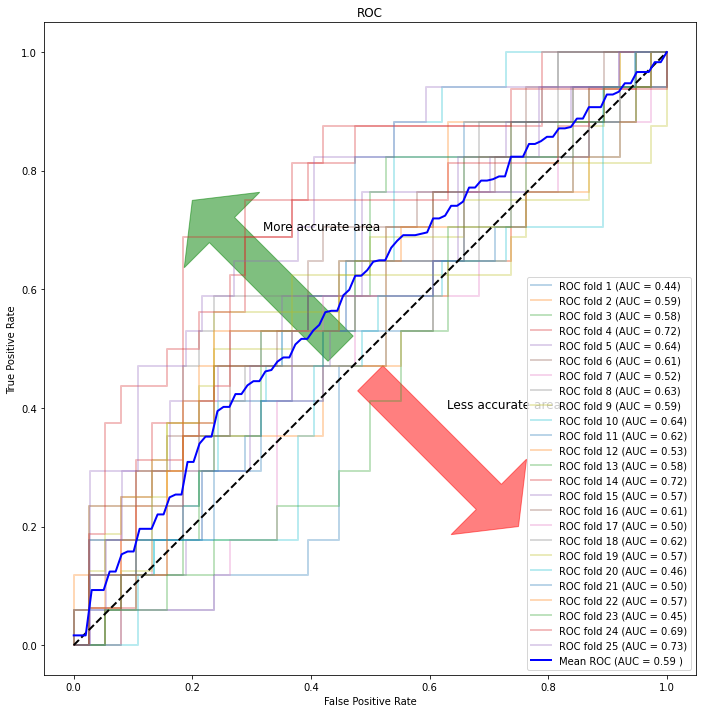

In [ ]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in rskf.split(X,y):
    prediction = pipeline5.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

<ipython-input-123-c47179754758>:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.

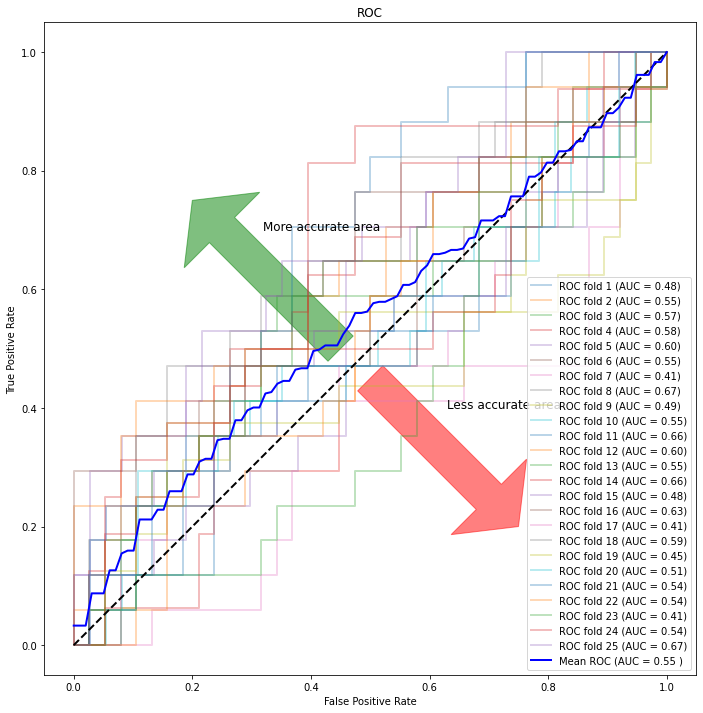

In [ ]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in rskf.split(X,y):
    prediction = pipeline2.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Task 5 : Presenting Machine Learning Products to the Business Users

## Modelling

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    confusion_matrix = metrics.confusion_matrix(ytest, ypred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['resign', 'no_resign'])
    cm_display.plot()
    plt.show()

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(5, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

Accuracy (Test Set): 0.69
Precision (Test Set): 0.45
Recall (Test Set): 0.31
F1-Score (Test Set): 0.37
AUC: 0.57


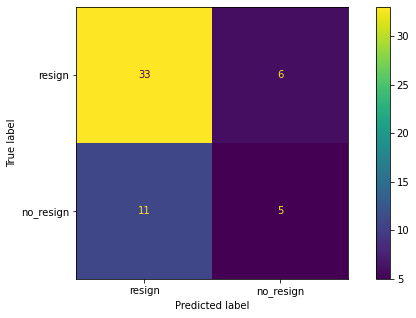

In [ ]:
X_tl, y_tl = tl.fit_resample(X_train,y_train)
xg.fit(X_tl,y_tl)
eval_classification(xg, X_tl, y_tl, X_test, y_test)

Text(0.5, 0, 'Hiring Age of Employee')

<Figure size 1152x576 with 0 Axes>

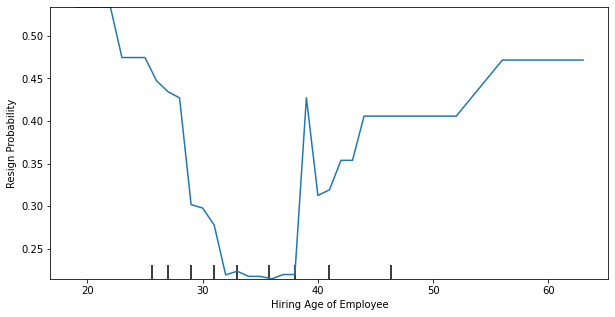

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['usia_hiring'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Hiring Age of Employee")

Text(0.5, 0, 'Duration of Work')

<Figure size 1152x576 with 0 Axes>

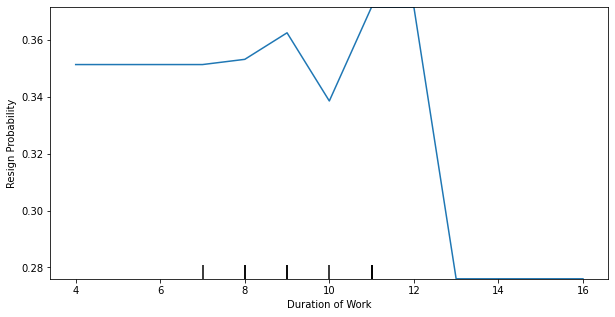

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['lama_kerja'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Duration of Work")

Text(0.5, 0, 'Skor Kepuasan Pegawai')

<Figure size 1152x576 with 0 Axes>

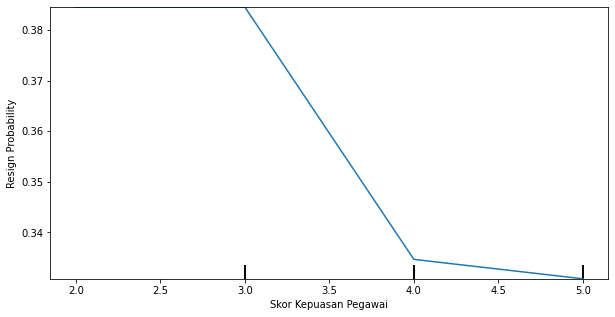

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['SkorKepuasanPegawai'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Skor Kepuasan Pegawai")

Text(0.5, 0, 'Performance Pegawai')

<Figure size 1152x576 with 0 Axes>

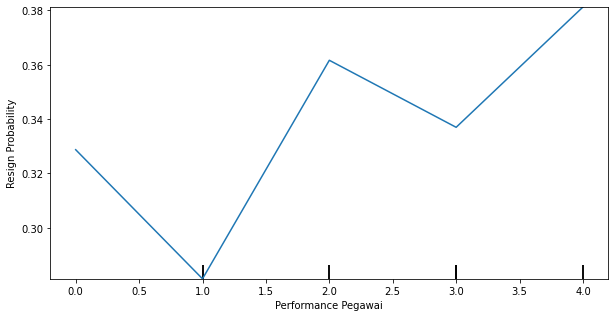

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['PerformancePegawai'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Performance Pegawai")

<Figure size 1152x576 with 0 Axes>

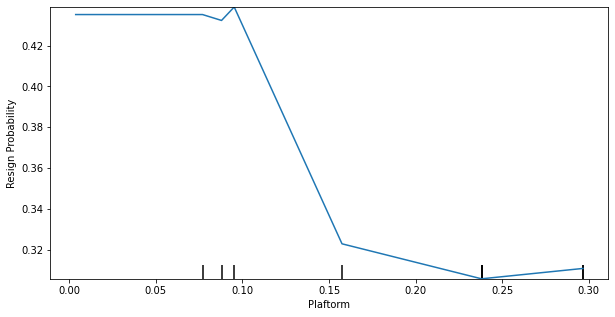

In [ ]:
plt.figure(figsize= (16,8));
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['platform_hiring_encode']);
pdp1.axes_[0,0].set_ylabel("Resign Probability");
pdp1.axes_[0,0].set_xlabel("Plaftorm");

Text(0.5, 0, 'Skor Engagement Karyawan')

<Figure size 1152x576 with 0 Axes>

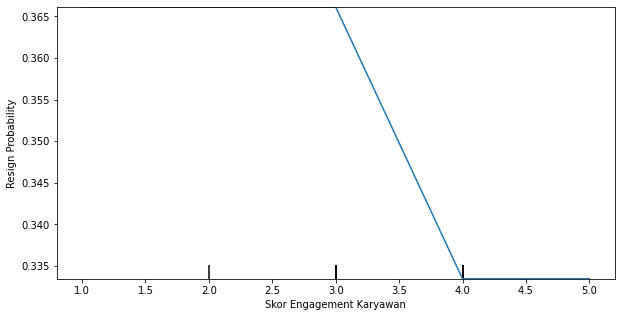

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['SkorSurveyEngagement'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Skor Engagement Karyawan")

Text(0.5, 0, 'JumlahKeterlambatanSebulanTerakhir')

<Figure size 1152x576 with 0 Axes>

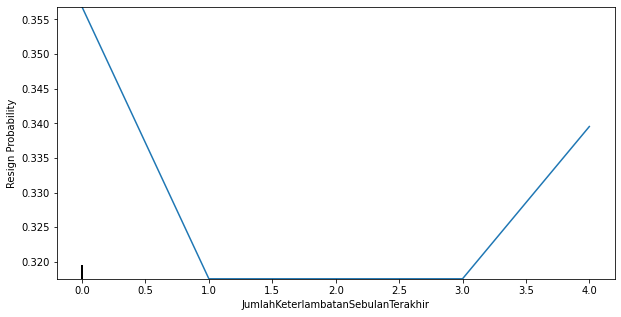

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['JumlahKeterlambatanSebulanTerakhir'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("JumlahKeterlambatanSebulanTerakhir")

Text(0.5, 0, 'Tingkat Pendidikan')

<Figure size 1152x576 with 0 Axes>

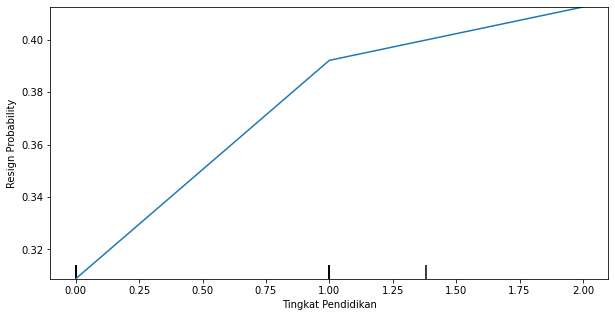

In [ ]:
plt.figure(figsize= (16,8))
pdp1 = PartialDependenceDisplay.from_estimator(xg, X_tl, ['TingkatPendidikan'])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Tingkat Pendidikan")

In [ ]:
X_tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenjangKarir                        192 non-null    int64  
 1   PerformancePegawai                  192 non-null    int64  
 2   SkorSurveyEngagement                192 non-null    int64  
 3   SkorKepuasanPegawai                 192 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir  192 non-null    float64
 5   JumlahKetidakhadiran                192 non-null    float64
 6   TingkatPendidikan                   192 non-null    int64  
 7   usia_hiring                         192 non-null    int64  
 8   lama_kerja                          192 non-null    int64  
 9   JumlahKeikutsertaanProjek_value     192 non-null    int64  
 10  platform_hiring_encode              192 non-null    float64
 11  StatusPernikahan_Belum_menikah      192 non-n

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


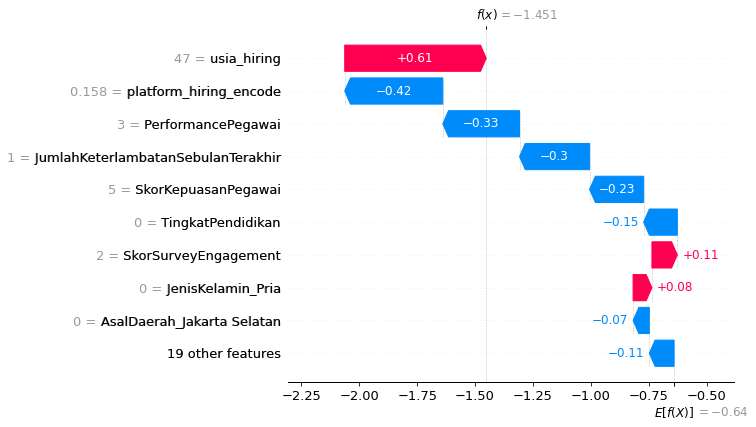

In [ ]:
import xgboost
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xg)
shap_values = explainer(X_tl)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

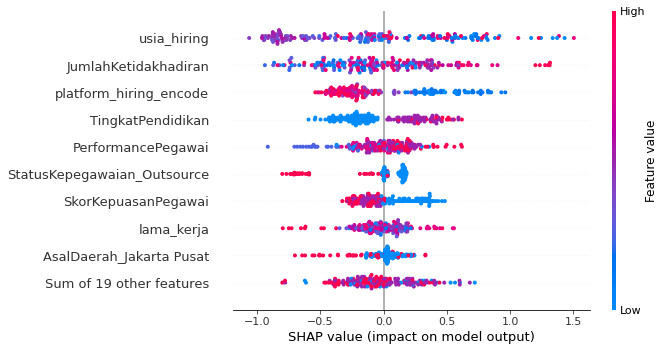

In [ ]:
shap.plots.beeswarm(shap_values)

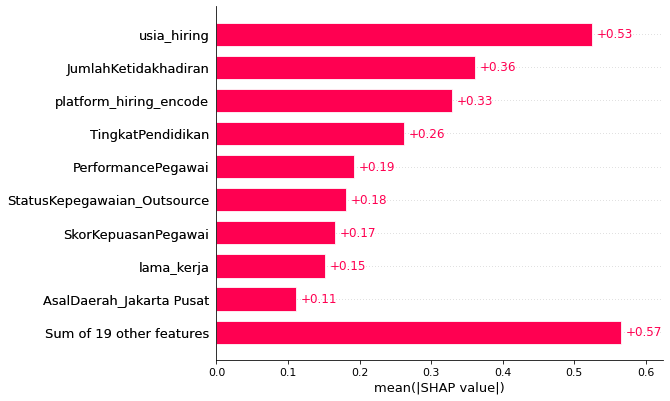

In [ ]:
shap.plots.bar(shap_values)